# Desafío Regresión desde la econometría
- Karen Cortés
- Constanza Córdova

## Desafío 1: Prepare el ambiente de trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('Credit.csv')

In [3]:
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
df.head(100)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
95,14.084,855,120,5,46,17,Female,No,Yes,African American,0
96,14.312,5382,367,1,59,17,Male,Yes,No,Asian,1380
97,26.067,3388,266,4,74,17,Female,No,Yes,African American,155
98,36.295,2963,241,2,68,14,Female,Yes,No,African American,375


In [6]:
df['Ethnicity'].value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [7]:
df['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [8]:
df['Married'].value_counts()

Yes    245
No     155
Name: Married, dtype: int64

In [9]:
df['Student'].value_counts()

No     360
Yes     40
Name: Student, dtype: int64

In [10]:
df['Asian'] = np.where(df['Ethnicity']=='Asian', 1, 0)
df['AfricanAmerican'] = np.where(df['Ethnicity']=='African American', 1, 0)
df['Caucasian'] = np.where(df['Ethnicity']=='Caucasian', 1, 0)
df['Male'] = np.where(df['Gender']=='Female', 0, 1)
df['Married_no'] = np.where(df['Married']=='No', 1, 0)
df['Student_yes'] = np.where(df['Student']=='Yes', 1, 0)

In [11]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Asian,AfricanAmerican,Caucasian,Male,Married_no,Student_yes
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,0,1,1,0,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1,0,0,0,0,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0,0,1,1,0
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0,0,0,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,0,1,1,0,0


## Desafío 2: Genere gráficos descriptivos para las variables contínuas
- Genere una función llamada plot_hist que genere un histograma de la variable e indique la media y mediana de la misma. Agrege una legenda para indicar qué representa cada línea.
- ¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [19]:
def plot_hist(dataframe, variable):
        
    media = np.mean(dataframe[variable].dropna())
    mediana = np.median(dataframe[variable].dropna())
    plt.hist(dataframe[variable].dropna(), color='green', alpha=.5, label=variable)
    plt.axvline(media, color='tomato', label='media '+str(media))
    plt.axvline(mediana, color='blue', label='mediana '+str(mediana))
    plt.legend()           

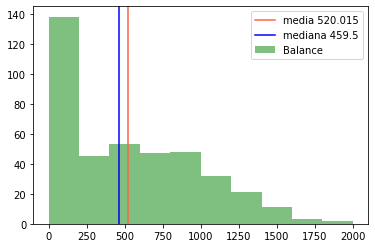

In [20]:
plot_hist(df, 'Balance')

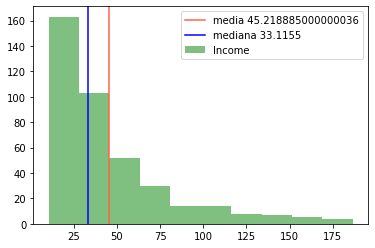

In [21]:
plot_hist(df, 'Income')

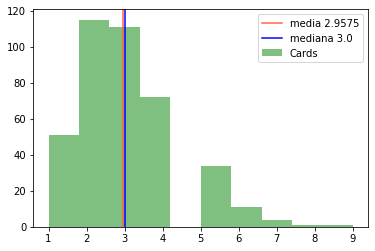

In [22]:
plot_hist(df, 'Cards')

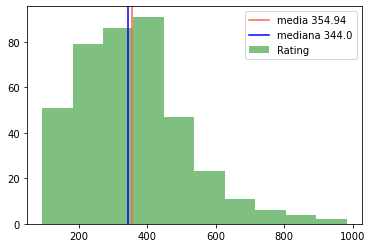

In [23]:
plot_hist(df, 'Rating')

¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

## Desafío 3: Regresión Lineal Simple

Utilizando statsmodels , comente brevemente los siguientes puntos:
- ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
- ¿Qué podemos decir sobre el comportamiento de Student ?
<br>¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

In [24]:
modelo1 = smf.ols('Balance ~ Student', df).fit()

In [25]:
modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.49e-07
Time:                        09:58:27   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        480.3694     23.434     20.499      0.000     434.300     526.439
Student[T.Yes]   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
modelo2 = smf.ols('Balance ~ Income', df).fit()

In [27]:
modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.03e-22
Time:                        09:58:29   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
modelo3 = smf.ols('Balance ~ Rating', df).fit()

In [29]:
modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Wed, 11 Nov 2020   Prob (F-statistic):          1.90e-120
Time:                        09:58:32   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?

R: la variable Rating tiene una mayor capacidad explicativa del Balance, la variabilidad del Balance en la muestra se explica en un 74,6% por el Rating (Ranking del crédito)

##### ¿Qué podemos decir sobre el comportamiento de Student ?

R: el ser estudiante explica en un 6.7% la variabilidad en el Balance de la muestra

##### ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

R: 

## Desafío 4: Genere un modelo que incluya todos los regresores

##### estandarizando variables del dataframe

In [13]:
df_copia = df.copy()

def estandarizar(dataframe, variable):
    media = np.mean(dataframe[variable].dropna())
    std = np.std(dataframe[variable].dropna())
   
    dataframe['z_'+variable] = (dataframe[variable] - media) / std
    

In [14]:
estandarizar(df_copia, 'Income')
estandarizar(df_copia, 'Limit')
estandarizar(df_copia, 'Rating')
estandarizar(df_copia, 'Cards')
estandarizar(df_copia, 'Age')
estandarizar(df_copia, 'Education')
estandarizar(df_copia, 'Asian')
estandarizar(df_copia, 'AfricanAmerican')
estandarizar(df_copia, 'Caucasian')
estandarizar(df_copia, 'Male')
estandarizar(df_copia, 'Married_no')
estandarizar(df_copia, 'Student_yes')
estandarizar(df_copia, 'Balance')

In [15]:
df_copia

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,...,z_Cards,z_Age,z_Education,z_Asian,z_AfricanAmerican,z_Caucasian,z_Male,z_Married_no,z_Student_yes,z_Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,...,-0.699130,-1.257674,-0.784930,-0.585049,-0.573501,1.005013,1.035635,-0.795395,-0.333333,-0.407277
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,...,0.031032,1.528451,0.496588,1.709260,-0.573501,-0.995012,-0.965592,-0.795395,3.000000,0.834056
2,104.593,7075,514,4,71,11,Male,No,No,Asian,...,0.761194,0.889964,-0.784930,1.709260,-0.573501,-0.995012,1.035635,1.257237,-0.333333,0.130634
3,148.924,9504,681,3,36,11,Female,No,No,Asian,...,0.031032,-1.141586,-0.784930,1.709260,-0.573501,-0.995012,-0.965592,1.257237,-0.333333,0.966900
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,...,-0.699130,0.715831,0.816968,-0.585049,-0.573501,1.005013,1.035635,-0.795395,-0.333333,-0.411633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,...,0.031032,-1.373763,-0.144171,-0.585049,-0.573501,1.005013,1.035635,-0.795395,-0.333333,0.087078
396,13.364,3838,296,5,65,17,Male,No,No,African American,...,1.491355,0.541698,1.137347,-0.585049,1.743675,-0.995012,1.035635,1.257237,-0.333333,-0.087144
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,...,1.491355,0.657787,-0.464550,-0.585049,-0.573501,1.005013,-0.965592,-0.795395,-0.333333,-0.831944
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,...,-1.429291,-0.677231,-0.144171,-0.585049,-0.573501,1.005013,1.035635,-0.795395,-0.333333,-1.132477


##### Se genera nuevo modelo con variables estandarizadas

In [66]:
modelo5 = smf.ols('z_Balance ~ z_Income+z_Limit+z_Rating+z_Cards+z_Age+z_Education+z_Asian+z_AfricanAmerican+z_Caucasian+z_Male+z_Married_no+z_Student_yes', df_copia).fit()

In [67]:
modelo5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              z_Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Wed, 11 Nov 2020   Prob (F-statistic):          1.11e-253
Time:                        11:07:35   Log-Likelihood:                 53.095
No. Observations:                 400   AIC:                            -82.19
Df Residuals:                     388   BIC:                            -34.29
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.041e-17      0.011  -9.68e-16      1.000      -0.021       0.021
z_Income             -0.5982      0.018    -33.314      0.000      -0.633      -0.563
z_Limit               0.9584      0.165      5.824      0.000       0.635       1.282
z_Rating              0.3825      0.165      2.315      0.021       0.058       0.707
z_Cards               0.0529      0.013      4.083      0.000       0.027       0.078
z_Age                -0.0230      0.011     -2.088      0.037      -0.045      -0.001
z_Education          -0.0075      0.011     -0.688      0.492      -0.029       0.014
z_Asian               0.0073      0.008      0.955      0.340      -0.008       0.022
z_AfricanAmerican    -0.0086      0.008     -1.120      0.263      -0.024       0.006
z_Caucasian           0.0011      0.006      0.164      0.870      -0.012       0.014
z_Male                0.0116      0.011      1.075      0.283      -0.010       0.033
z_Married_no          0.0091      0.011      0.824      0.411      -0.013       0.031
z_Student_yes         0.2782      0.011     25.459      0.000       0.257       0.300
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     8.18e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### Comente brevemente sobre el poder explicativo en la varianza de y y las principales características de los predictores.

R: 

## Desafío 5: Depure el modelo e incluya sólo los predictores significativo
- En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia p-value <=.025 . Comente brevemente sobre el poder explicativo en la varianza de y y las principales características de los predictores.
- ¿Mejoró o empeoró el modelo con la reducción de regresores?

In [68]:
modelo6 = smf.ols('z_Balance ~ z_Income+z_Limit+z_Rating+z_Cards+z_Student_yes', df_copia).fit()

In [69]:
modelo6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              z_Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Wed, 11 Nov 2020   Prob (F-statistic):          3.60e-261
Time:                        11:08:04   Log-Likelihood:                 48.947
No. Observations:                 400   AIC:                            -85.89
Df Residuals:                     394   BIC:                            -61.94
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.041e-17      0.011  -9.65e-16      1.000      -0.021       0.021
z_Income         -0.6037      0.018    -34.024      0.000      -0.639      -0.569
z_Limit           0.9760      0.163      5.977      0.000       0.655       1.297
z_Rating          0.3661      0.164      2.234      0.026       0.044       0.688
z_Cards           0.0532      0.013      4.118      0.000       0.028       0.079
z_Student_yes     0.2789      0.011     25.754      0.000       0.258       0.300
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                         35.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Desafío 6:
Utilizando lmplot de seaborn , inspeccione el comportamiento de los tres principales determinantes.

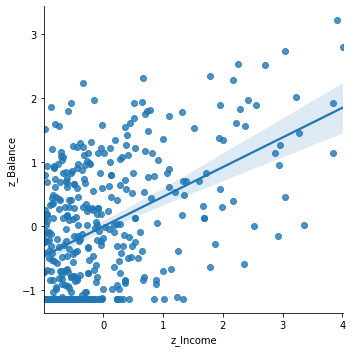

In [87]:
sns.lmplot(x='z_Income',y='z_Balance', data=df_copia)

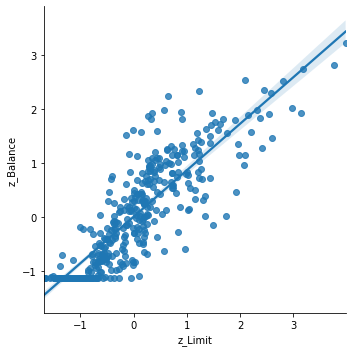

In [88]:
sns.lmplot(x='z_Limit',y='z_Balance', data=df_copia)

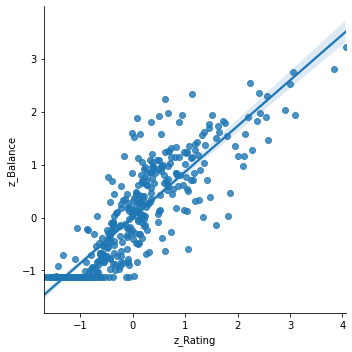

In [89]:
sns.lmplot(x='z_Rating',y='z_Balance', data=df_copia)

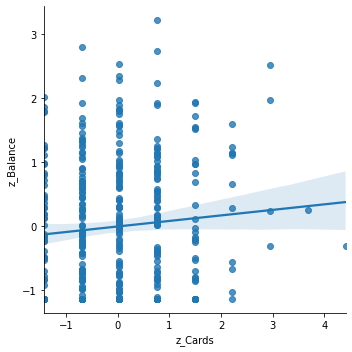

In [90]:
sns.lmplot(x='z_Cards',y='z_Balance', data=df_copia)

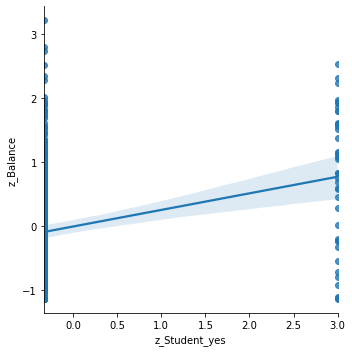

In [91]:
sns.lmplot(x='z_Student_yes',y='z_Balance', data=df_copia)